# 1. Iris 데이터 꽃받침(sepal)에 따른 2차원 시각화

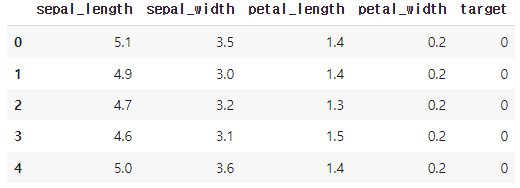

> sepal length, sepal width, petal length petal width는 독립변수이며 target이 종속 변수가 된다. 이 중 2개의 독립변수만으로 종속 변수를 유추해 낼 수 있지 않을까 하는 것이 주성분 분석(PCA) 방법이다.

## 1.1 데이터 읽어 오기

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
# iris.data : 독립변수
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
# iris.target : 종속변수
iris.target[:5]

array([0, 0, 0, 0, 0])

## 1.2 데이터셋 만들기

In [5]:
import pandas as pd 

columns = ['sepal_length','sepal_width','petal_length','petal_width']
df_iris = pd.DataFrame(iris.data, columns=columns)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df_iris['target'] = iris.target
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 1.3 데이터 시각화

In [7]:
df_iris[df_iris['target'] == 0][:5]

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df_iris[df_iris['target']==0]['sepal_length'][:5]

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

0  :  ^
1  :  s
2  :  o


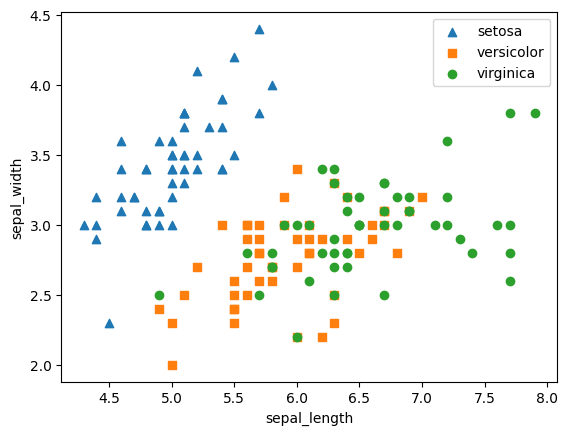

In [11]:
import matplotlib.pyplot as plt

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    print(i, ' : ', marker)
    x_axis_data = df_iris[df_iris['target']==i]['sepal_length']
    y_axis_data = df_iris[df_iris['target']==i]['sepal_width']

    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.show()

> 실행 결과 setosa는 정확한 분류가 가능하지만 다른 두 종류는 분류가 어려운 것을 볼 수 있다. 이를 해결하기 위해 PCA를 이용한 차원축소를 진행할 것이다.

## 1.4 marker 참조

In [12]:
from matplotlib.lines import Line2D
Line2D.markers.items()

dict_items([('.', 'point'), (',', 'pixel'), ('o', 'circle'), ('v', 'triangle_down'), ('^', 'triangle_up'), ('<', 'triangle_left'), ('>', 'triangle_right'), ('1', 'tri_down'), ('2', 'tri_up'), ('3', 'tri_left'), ('4', 'tri_right'), ('8', 'octagon'), ('s', 'square'), ('p', 'pentagon'), ('*', 'star'), ('h', 'hexagon1'), ('H', 'hexagon2'), ('+', 'plus'), ('x', 'x'), ('D', 'diamond'), ('d', 'thin_diamond'), ('|', 'vline'), ('_', 'hline'), ('P', 'plus_filled'), ('X', 'x_filled'), (0, 'tickleft'), (1, 'tickright'), (2, 'tickup'), (3, 'tickdown'), (4, 'caretleft'), (5, 'caretright'), (6, 'caretup'), (7, 'caretdown'), (8, 'caretleftbase'), (9, 'caretrightbase'), (10, 'caretupbase'), (11, 'caretdownbase'), ('None', 'nothing'), ('none', 'nothing'), (' ', 'nothing'), ('', 'nothing')])

In [13]:
Line2D.lineStyles.items()

dict_items([('-', '_draw_solid'), ('--', '_draw_dashed'), ('-.', '_draw_dash_dot'), (':', '_draw_dotted'), ('None', '_draw_nothing'), (' ', '_draw_nothing'), ('', '_draw_nothing')])

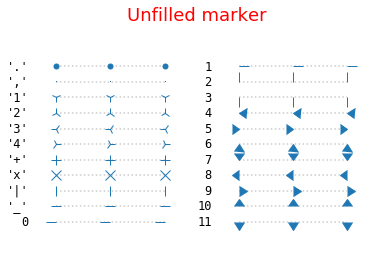

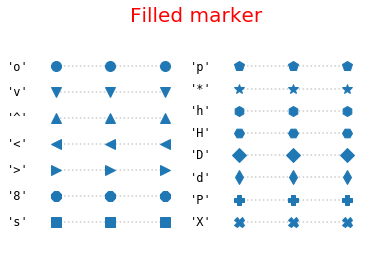

# 2. PCA를 이용한 차원축소

## 2.1 데이터 표준화

> 각 feature 별 데이터 분포는 다르게 나타난다. 차원 축소를 위해서 각 feature별 데이터의 분포를 균일하게 해주어야 정확한 정보들을 얻을 수 있다. 여기서는 데이터 표준화 유무에 따른 PCA 정보를 확인해 보자.

In [14]:
from sklearn.preprocessing import StandardScaler

iris_data = df_iris.iloc[:, :-1]
iris_scaled = StandardScaler().fit_transform(iris_data)

> 위와 같이 기본 데이터인 iris_data와 표준화를 진행한 iris_scaled를 얻었다. 우선 기존 데이터를 이용하여 PCA를 구해 보자.

## 2.2 기본 데이터 확인

In [15]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(iris_data)

PCA()

In [16]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [17]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

> PCA를 적용하게 되면 기존 데이터를 축소하고 정렬을 진행한다. 실 데이터가 가공된 것이므로 기존 feature와의 순서가 변경되게 된다. 

> 실행 결과 첫 번째 feature의 분산정도가 큰 것을 볼 수 있다.

In [19]:
import numpy as np

x = np.arange(4)
x

array([0, 1, 2, 3])

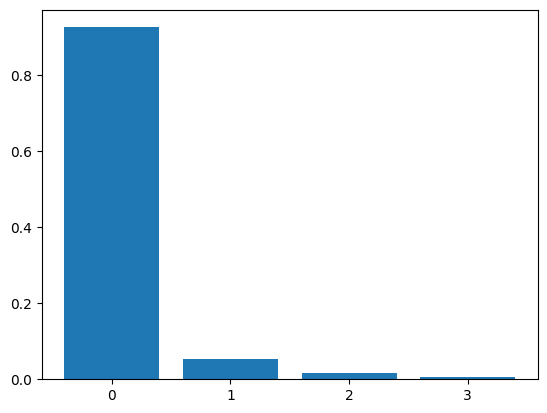

In [20]:
import matplotlib.pyplot as plt

plt.bar(x, pca.explained_variance_ratio_)
plt.xticks(x, x)

plt.show()

> 차트 확인결과 확연하게 첫 번째 feature가 분산량이 많은 것을 볼 수 있다.

## 2.3 표준화 데이터 확인

In [21]:
pca = PCA()

pca.fit(iris_scaled)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

> 표준화한 정보에서는 첫 번째와 두 번째 feature의 분산 정도가 높은 것을 볼 수 있다.

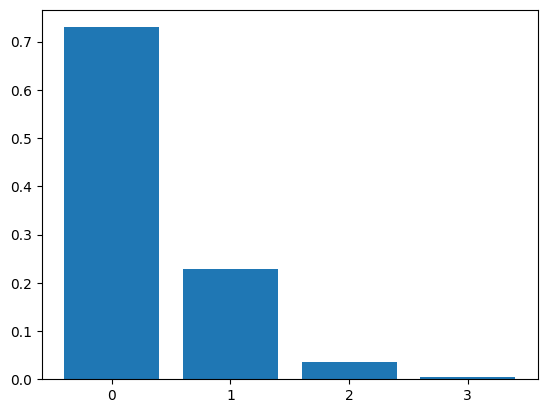

In [22]:
import matplotlib.pyplot as plt

plt.bar(x, pca.explained_variance_ratio_)
plt.xticks(x, x)

plt.show()

> 차트로 확인 결과 1, 2 번째 feature가 다른 feature에 비해 확연하게 차이를 보이는 것을 볼 수 있다. 여기서 분산량이 많을 수록 주성분분석에서 사용할 주 성분이 됨으로 1, 2 번째 feature 정보를 사용하면 된다.

## 2.4 주성분 지정을 통한 분류확인

In [23]:
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

iris_pca.shape

(150, 2)

In [25]:
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [26]:
pca_columns = ['pca_component_1', 'pca_component_2']
df_iris_pca = pd.DataFrame(iris_pca, columns=pca_columns)
df_iris_pca['target'] = iris.target

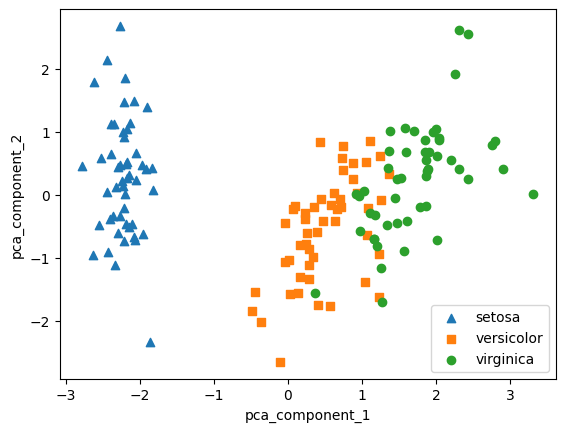

In [27]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_data = df_iris_pca[df_iris_pca['target'] == i]['pca_component_1']
    y_data = df_iris_pca[df_iris_pca['target'] == i]['pca_component_2']

    plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

# 3. 의사 결정 트리

## 3.1 모델 생성

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()

## 3.2 기본 데이터 교차 검증

In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, iris.data, iris.target, scoring='accuracy', cv=3)
print(f'원본 데이터 교차 검증  개별 정확도 : {scores}')
print(f'원본 데이터 평균 정확도 : {np.mean(scores)}')

원본 데이터 교차 검증  개별 정확도 : [0.98 0.92 1.  ]
원본 데이터 평균 정확도 : 0.9666666666666667


## 3.3 PCA 데이터 교차 검증

In [30]:
pca_X = df_iris_pca.drop('target', axis=1)
pca_y = df_iris_pca['target']

scores = cross_val_score(dt_clf, pca_X, pca_y, scoring='accuracy', cv=3)
print(f'PCA 데이터 교차 검증 개별 정확도 : {scores}')
print(f'PCA 데이터 평균 정확도 : {np.mean(scores)}')

PCA 데이터 교차 검증 개별 정확도 : [0.9  0.9  0.88]
PCA 데이터 평균 정확도 : 0.8933333333333334


## 3.4 결론

> 기존 데이터의 교차 검증의 차이는 대략 10%내로 큰 차이가 보이기는 하지만 실제 feature를 50%로 줄여서 한 결과로 보면 굉장히 좋은 성능을 보여준다. 데이터 분류 시 빠른 처리를 요한다면 위와 같이 차원을 축소하여 성능을 향상시킬 수 있다.

#참조 
- https://pyvisuall.tistory.com/39